<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/Final_simple_linear_regression_1_delivery_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [ ]:
dataset = pd.read_csv("delivery_time (1).csv")

In [ ]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#EDA and Data Visualization

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-6-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

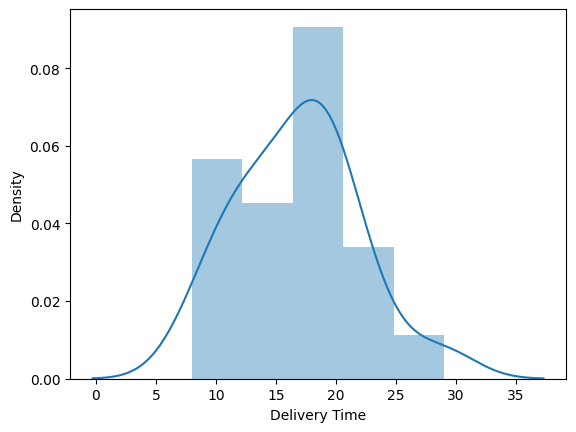

In [ ]:
sns.distplot(dataset['Delivery Time'])

<ipython-input-7-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

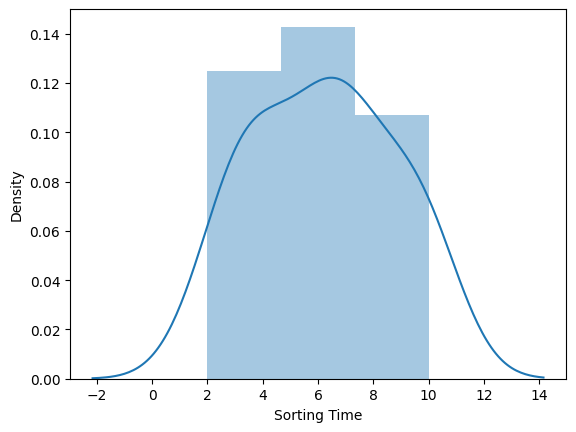

In [ ]:
sns.distplot(dataset['Sorting Time'])

#Feature Engineering

In [ ]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


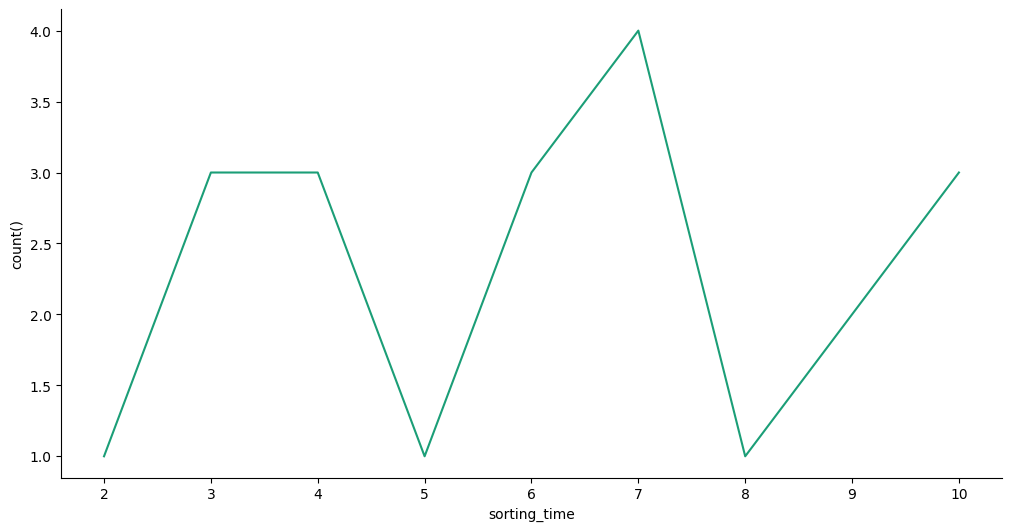

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sorting_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sorting_time'}, axis=1)
              .sort_values('sorting_time', ascending=True))
  xs = counted['sorting_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('sorting_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sorting_time')
_ = plt.ylabel('count()')

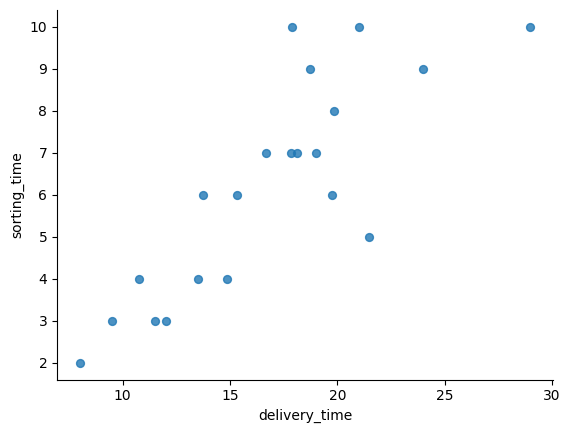

In [ ]:


from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='delivery_time', y='sorting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Correlation Analysis

In [ ]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

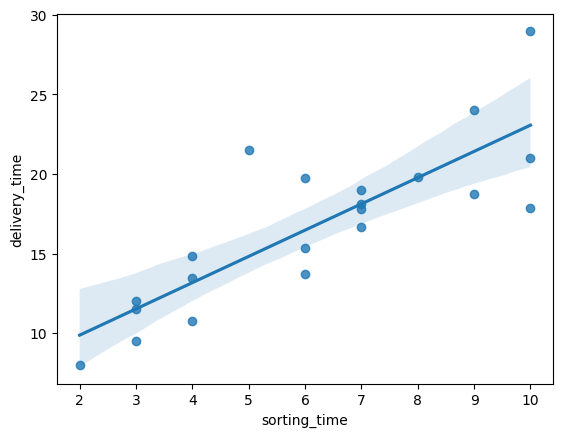

In [ ]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

#Model Building

In [ ]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# Feature Engineering
# Feature selection using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(dataset.drop('delivery_time', axis=1), dataset['delivery_time'])
# Print feature importances
print(selection.feature_importances_)
# Select features based on importance threshold
threshold = 0.01
selected_features = [i for i, v in enumerate(selection.feature_importances_) if v > threshold]
# Create new dataset with selected features
dataset_selected = dataset.iloc[:, selected_features + [len(dataset.columns) - 1]]
# Model Building
model_selected = smf.ols("delivery_time~sorting_time", data=dataset_selected).fit()
# Model Testing
# Finding Coefficient parameters
model_selected.params
# Finding tvalues and pvalues
model_selected.tvalues, model_selected.pvalues
# Finding Rsquared Values
model_selected.rsquared, model_selected.rsquared_adj

[1.]


(0.6822714748417231, 0.6655489208860244)

#Model Predictions

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [ ]:


# Apply log transformation to both delivery_time and sorting_time
dataset_log = dataset.copy()
dataset_log['delivery_time'] = np.log(dataset_log['delivery_time'])
dataset_log['sorting_time'] = np.log(dataset_log['sorting_time'])

# Build and evaluate model on log-transformed data
model_log = smf.ols("delivery_time~sorting_time", data=dataset_log).fit()
print("Log Transformation")
print(f"R-squared: {model_log.rsquared:.4f}")
print(f"Adjusted R-squared: {model_log.rsquared_adj:.4f}")

# Apply square root transformation to both delivery_time and sorting_time
dataset_sqrt = dataset.copy()
dataset_sqrt['delivery_time'] = np.sqrt(dataset_sqrt['delivery_time'])
dataset_sqrt['sorting_time'] = np.sqrt(dataset_sqrt['sorting_time'])

# Build and evaluate model on square root-transformed data
model_sqrt = smf.ols("delivery_time~sorting_time", data=dataset_sqrt).fit()
print("Square Root Transformation")
print(f"R-squared: {model_sqrt.rsquared:.4f}")
print(f"Adjusted R-squared: {model_sqrt.rsquared_adj:.4f}")

# Apply reciprocal transformation to both delivery_time and sorting_time
dataset_reciprocal = dataset.copy()
dataset_reciprocal['delivery_time'] = 1 / dataset_reciprocal['delivery_time']
dataset_reciprocal['sorting_time'] = 1 / dataset_reciprocal['sorting_time']

# Build and evaluate model on reciprocal-transformed data
model_reciprocal = smf.ols("delivery_time~sorting_time", data=dataset_reciprocal).fit()
print("Reciprocal Transformation")
print(f"R-squared: {model_reciprocal.rsquared:.4f}")
print(f"Adjusted R-squared: {model_reciprocal.rsquared_adj:.4f}")



Log Transformation
R-squared: 0.7722
Adjusted R-squared: 0.7602
Square Root Transformation
R-squared: 0.7292
Adjusted R-squared: 0.7149
Reciprocal Transformation
R-squared: 0.8355
Adjusted R-squared: 0.8268


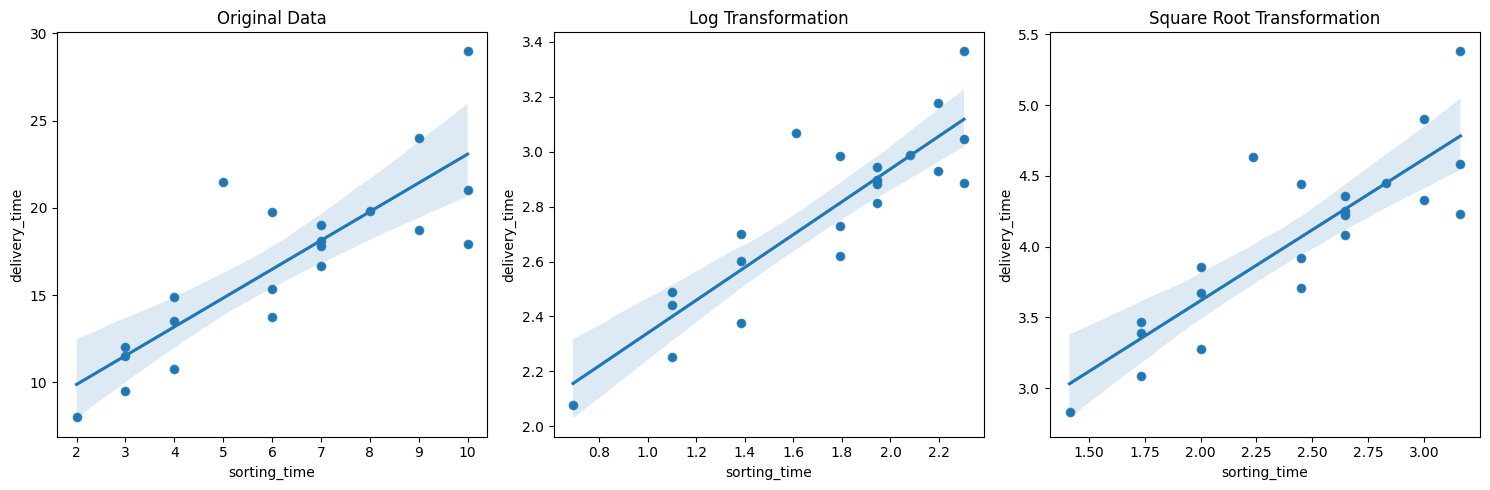

In [ ]:
# Plot the data and regression line for each transformation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data
sns.scatterplot(x="sorting_time", y="delivery_time", data=dataset, ax=axes[0])
sns.regplot(x="sorting_time", y="delivery_time", data=dataset, ax=axes[0])
axes[0].set_title("Original Data")

# Log-transformed data
sns.scatterplot(x="sorting_time", y="delivery_time", data=dataset_log, ax=axes[1])
sns.regplot(x="sorting_time", y="delivery_time", data=dataset_log, ax=axes[1])
axes[1].set_title("Log Transformation")

# Square root-transformed data
sns.scatterplot(x="sorting_time", y="delivery_time", data=dataset_sqrt, ax=axes[2])
sns.regplot(x="sorting_time", y="delivery_time", data=dataset_sqrt, ax=axes[2])
axes[2].set_title("Square Root Transformation")

plt.tight_layout()
plt.show()


In [ ]:
# Import the stats module
import scipy.stats as stats

# Apply Box-Cox transformation to both delivery_time and sorting_time
dataset_boxcox = dataset.copy()
dataset_boxcox['delivery_time'], lambda_delivery = stats.boxcox(dataset_boxcox['delivery_time'])
dataset_boxcox['sorting_time'], lambda_sorting = stats.boxcox(dataset_boxcox['sorting_time'])

# Build and evaluate model on Box-Cox-transformed data
model_boxcox = smf.ols("delivery_time~sorting_time", data=dataset_boxcox).fit()
print("Box-Cox Transformation")
print(f"Lambda delivery: {lambda_delivery:.4f}")
print(f"Lambda sorting: {lambda_sorting:.4f}")
print(f"R-squared: {model_boxcox.rsquared:.4f}")
print(f"Adjusted R-squared: {model_boxcox.rsquared_adj:.4f}")

Box-Cox Transformation
Lambda delivery: 0.5457
Lambda sorting: 0.6986
R-squared: 0.7185
Adjusted R-squared: 0.7037


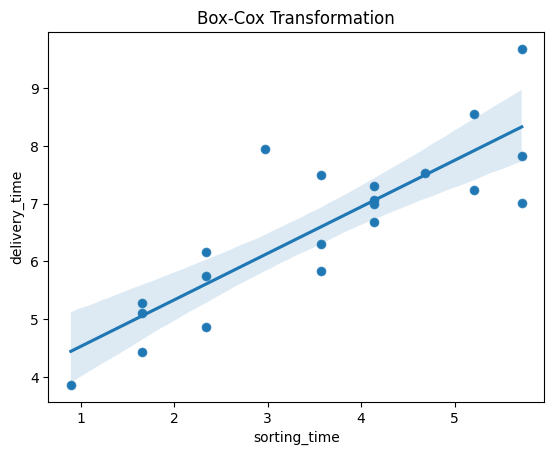

In [ ]:

# Plot the data and regression line for Box-Cox transformation
sns.scatterplot(x="sorting_time", y="delivery_time", data=dataset_boxcox)
sns.regplot(x="sorting_time", y="delivery_time", data=dataset_boxcox)
plt.title("Box-Cox Transformation")
plt.show()
